# DSO 530 Group Project Regression

- Please provide comments for every seciton of code
- Add your name as a comment at the top of every code cell
- Please do not overwrite anyone's code, if required create a new cell, copy and edit someone else's code

## Domain Knowledge and Project Summary

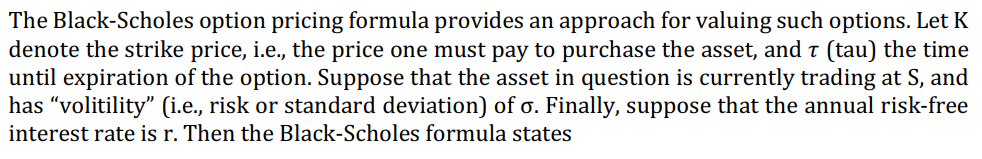

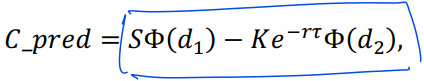

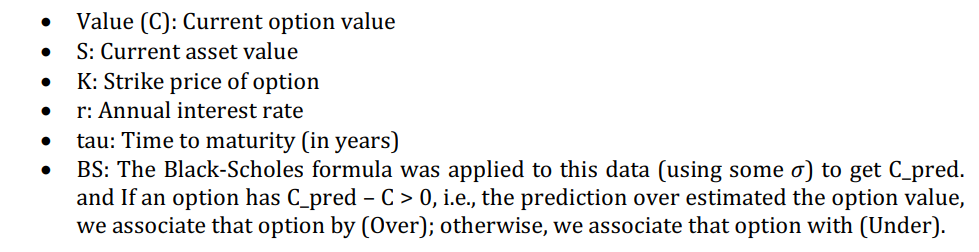

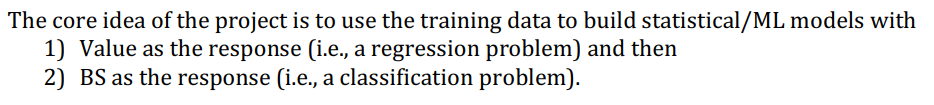

### Model should address:

- Data quality
- Feature Engineering
- Cross Validation
- Rescaling

### Model will be evaluated on the basis of:

- Out of sample R-sq for Value
- Classification error for BS

## Setup Code

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Falak

# Importing Data
data_df = pd.read_csv('option_train.csv')
data_df = data_df[['Value','BS','S','K','tau','r']]
print(data_df.info())
print(data_df.describe())
data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1679 non-null   float64
 1   BS      1680 non-null   object 
 2   S       1679 non-null   float64
 3   K       1678 non-null   float64
 4   tau     1679 non-null   float64
 5   r       1680 non-null   float64
dtypes: float64(5), object(1)
memory usage: 78.9+ KB
None
             Value            S            K          tau            r
count  1679.000000  1679.000000  1678.000000  1679.000000  1680.000000
mean     15.072013   440.639445   438.241955     0.437519     0.030235
std      14.036492    13.130436    23.408989     7.057555     0.000557
min       0.125000     0.000000   375.000000     0.003968     0.029510
25%       2.255002   433.863864   420.000000     0.119048     0.029820
50%      11.220588   442.525366   440.000000     0.202381     0.030130
75%      25.745904   447.320414   455.00000

,Value,BS,S,K,tau,r
0,21.670404,Under,431.623898,420.0,0.341270,0.03013
1,0.125000,Over,427.015526,465.0,0.166667,0.03126
2,20.691244,Under,427.762336,415.0,0.265873,0.03116
3,1.035002,Over,451.711658,460.0,0.063492,0.02972
4,39.553020,Under,446.718974,410.0,0.166667,0.02962


Value Screening Using JMP:

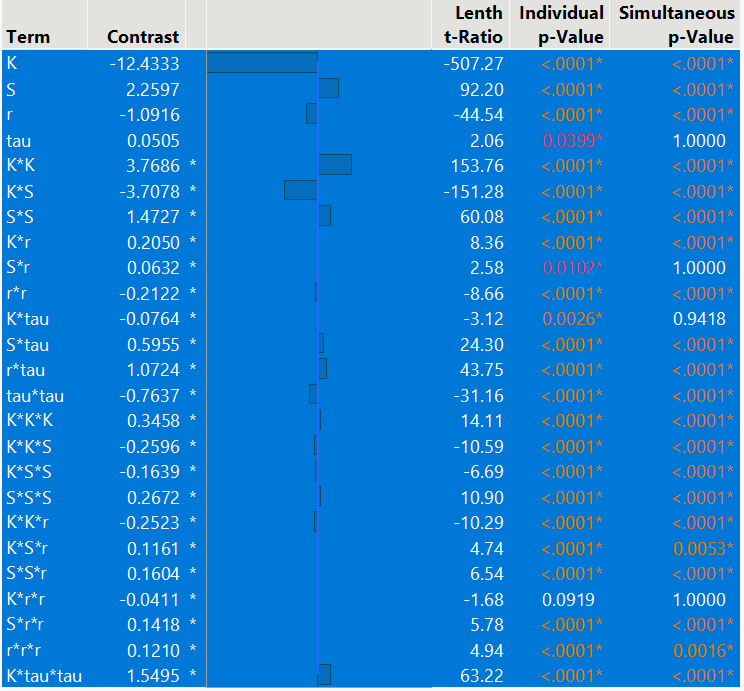

## Data Quality

In [ ]:
# Falak

# dropping blank data since imputation is not required due to limited blank data
print(f'Number of records before dropping blank data: {data_df.shape[0]}')
pre = data_df.shape[0]
data_df.dropna(inplace = True)
print(f'Number of records after dropping blank data: {data_df.shape[0]}')
print(f'Number of records dropped: {pre - data_df.shape[0]}')


Number of records before dropping blank data: 1680
Number of records after dropping blank data: 1678
Number of records dropped: 2


AxesSubplot(0.125,0.125;0.775x0.755)


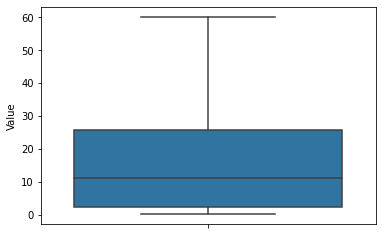

In [ ]:




# Falak

# Vizualization distribution of quantitative input and output variables
print(sns.boxplot(y = 'Value', data = data_df))

AxesSubplot(0.125,0.125;0.775x0.755)


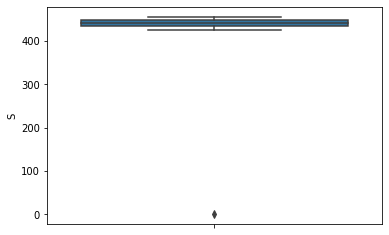

In [ ]:

# Falak

# Vizualization distribution of quantitative input and output variables
print(sns.boxplot(y = 'S', data = data_df))

# There is one option which has an asset value of 0, we will eliminate it to prevent erroneous data
data_df = data_df[data_df['S'] > 0]

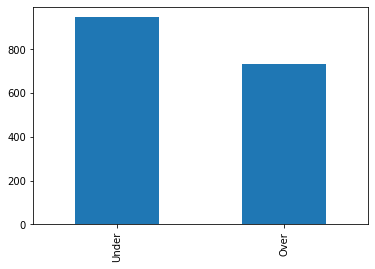

In [ ]:
data_df['BS'].value_counts().plot(kind = 'bar')

AxesSubplot(0.125,0.125;0.775x0.755)


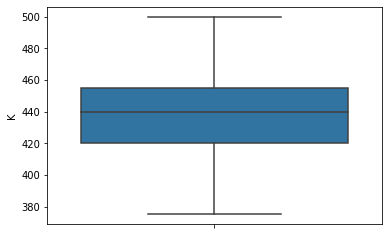

In [ ]:
# Falak

# Vizualization distribution of quantitative input and output variables
print(sns.boxplot(y = 'K', data = data_df))

# No outliers of concern

AxesSubplot(0.125,0.125;0.775x0.755)


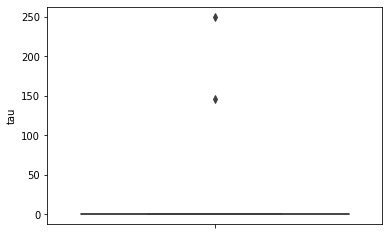

In [ ]:
# Falak

# Vizualization distribution of quantitative input and output variables
print(sns.boxplot(y = 'tau', data = data_df))

# There are two outliers in the maturity time which should be eliminated to prevent erroneous values
data_df = data_df[data_df['tau']<=1]

AxesSubplot(0.125,0.125;0.775x0.755)


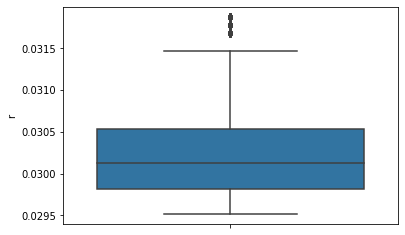

In [ ]:
# Falak

# Vizualization distribution of quantitative input and output variables
print(sns.boxplot(y = 'r', data = data_df))

In [ ]:
# Falak

# Total data points discarded
print(f'Total options discarded from data: {pre - data_df.shape[0]}')

Total options discarded from data: 5


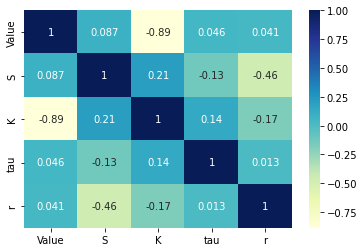

In [ ]:
# Falak

# checking for auto-correlation
sns.heatmap(data_df.corr(), cmap="YlGnBu", annot=True)

# Therefore colinearity does not seem to be an issue amongst predictors

In [ ]:
# Falak

# Create test and train data
x_train, x_test, y_train, y_test = train_test_split(data_df[data_df.columns[2:]], data_df['Value'], test_size = 0.2, random_state = 123)

## Multiple Linear Regression with No Feature Engineering

In [ ]:
# Falak

# Multiple linear regression with no feature engineering
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
print(f'Out of Sample R-square: {round(r2_score(y_test,y_pred),3)}')
y_pred = lm.predict(x_train)
print(f'In Sample R-square: {round(r2_score(y_train,y_pred),3)}')

# r-square bumped from 0.82 (base) to 0.91 by improving data quality

Out of Sample R-square: 0.907
In Sample R-square: 0.913


In [ ]:
# Falak

# Creating additional interaction features
cols = list(data_df.columns[2:])

for i in range(len(cols)):
  for j in range(i,len(cols)):
    data_df[cols[i]+'*'+cols[j]] = data_df[cols[i]] * data_df[cols[j]]

data_df.head()

,Value,BS,S,K,tau,r,S*S,S*K,S*tau,S*r,K*K,K*tau,K*r,tau*tau,tau*r,r*r
0,21.670404,Under,431.623898,420.0,0.341270,0.03013,186299.189584,181282.037286,147.300219,13.004828,176400.0,143.333333,12.6546,0.116465,0.010282,0.000908
1,0.125000,Over,427.015526,465.0,0.166667,0.03126,182342.259360,198562.219543,71.169254,13.348505,216225.0,77.500000,14.5359,0.027778,0.005210,0.000977
2,20.691244,Under,427.762336,415.0,0.265873,0.03116,182980.616442,177521.369606,113.730463,13.329074,172225.0,110.337302,12.9314,0.070688,0.008285,0.000971
3,1.035002,Over,451.711658,460.0,0.063492,0.02972,204043.421792,207787.362588,28.680105,13.424870,211600.0,29.206349,13.6712,0.004031,0.001887,0.000883
4,39.553020,Under,446.718974,410.0,0.166667,0.02962,199557.842089,183154.779504,74.453163,13.231816,168100.0,68.333333,12.1442,0.027778,0.004937,0.000877


In [ ]:
# Falak

# Create test and train data
x_train, x_test, y_train, y_test = train_test_split(data_df[data_df.columns[2:]], data_df['Value'], test_size = 0.2, random_state = 123)

## Multiple Linear Regression with Feature Engineering (Interaction Terms)

In [ ]:
# Falak

# Multiple linear regression with feature engineering (interaction terms with 2 variables)
# Printing out of sample r-square and p-values of variables
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
print(f'Out of Sample R-square: {round(r2_score(y_test,y_pred),3)}')
params = np.append(lm.intercept_,lm.coef_)
y_train_pred = lm.predict(x_train)
new_x_train = np.append(np.ones((len(x_train),1)), x_train, axis=1)
M_S_E = (sum((y_train-y_train_pred)**2))/(len(new_x_train)-len(new_x_train[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_x_train.T,new_x_train)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_x_train)-len(new_x_train[0])))) for i in t_b]
p_val = np.round(p_val,3)
features = list(lm.feature_names_in_)
features.insert(0, 'intercept')
p_val_df = pd.DataFrame({'Variable':features,'p-val':p_val})
p_val_df.set_index('Variable',drop = True, inplace = True)
p_val_df

# r-square increased from 0.907 -> 0.995

Out of Sample R-square: 0.995


,p-val
Variable,
intercept,0.001
S,0.017
K,0.000
tau,0.030
r,0.019
S*S,0.000
S*K,0.000
S*tau,0.000
S*r,0.011


In [ ]:
# Falak

# Removing insignificant variables from dataframe
for i in data_df.columns[2:]:
  if p_val_df.loc[i,'p-val'] > 0.05:
    data_df.drop(i,inplace = True,axis = 1)
    print(f'Dropping column: {i}')

Dropping column: K*tau
Dropping column: tau*r
Dropping column: r*r


In [ ]:
# Falak

# Create test and train data
x_train, x_test, y_train, y_test = train_test_split(data_df[data_df.columns[2:]], data_df['Value'], test_size = 0.2, random_state = 123)

In [ ]:
# Falak

# Scaling test and train input variables
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [ ]:
y_train

975      0.160009
1321    31.137713
346      1.505000
993     21.894677
1640    13.335168
          ...    
1127    12.450755
1351     3.375000
1411    29.679669
1394    10.847876
1539     2.220002
Name: Value, Length: 1340, dtype: float64

## Multiple Linear Regression with Feature Engineering (Interaction Terms) and Insignificant Variables Removed

In [ ]:
# Falak

# Multiple linear regression with feature engineering (interaction terms with 2 variables) and insignificant variables removed
# Printing out of sample r-square
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
print(f'Out of Sample R-square: {round(r2_score(y_test,y_pred),3)}')

# r-square remains the same after removing insignificant predictors

Out of Sample R-square: 0.995


## Multiple Linear Regression with Feature Engineering (Interaction Terms), Insignificant Variables Removed and K-Fold Cross Validation

In [ ]:
# Falak

# Multiple linear regression with feature engineering (interaction terms with 2 variables), insignificant variables removed and cross validation
# Printing out of sample r-square
lr_model = LinearRegression()
parameters = {'normalize':[True,False]}
lm = GridSearchCV(lr_model, parameters, refit=True, cv=5)
best_model = lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
print(f'Out of Sample R-square: {round(r2_score(y_test,y_pred),3)}')
y_pred = lm.predict(x_train)
print(f'In Sample R-square: {round(r2_score(y_train,y_pred),3)}')

# r-square remains the same after using cross validation

Out of Sample R-square: 0.995
In Sample R-square: 0.995


## Decision Tree Regressor - without hyperparameter tuning and k fold validation

In [ ]:
# Falak

dt_model = DecisionTreeRegressor()
# Fit model to training data
dt = dt_model.fit(x_train,y_train)
# Predict test data for out-of-sample r-sq
y_pred = dt.predict(x_test)
print(f'Out of Sample R-square: {round(r2_score(y_test,y_pred),3)}')
# Predict train data for in-sample r-sq
y_pred = dt.predict(x_train)
print(f'In Sample R-square: {round(r2_score(y_train,y_pred),3)}')

Out of Sample R-square: 0.989
In Sample R-square: 1.0


## Decision Tree Regressor - with hyperparameter tuning and k fold validation

In [ ]:
# Falak

# Create base model
dt_model = DecisionTreeRegressor()
# Initiate grid search for hyperparameter tuning and k-fold cv
gs = GridSearchCV(dt_model,
                  param_grid = {'max_depth': range(1,11),
                                'min_samples_split':range(10,60,10)},
                  cv = 5,
                  n_jobs = 1,
                  scoring = 'neg_mean_squared_error')
# Fit model to training data
dt = gs.fit(x_train,y_train)
# Predict test data for out-of-sample r-sq
y_pred = dt.predict(x_test)
print(f'Out of Sample R-square: {round(r2_score(y_test,y_pred),3)}')
# Predict train data for in-sample r-sq
y_pred = dt.predict(x_train)
print(f'In Sample R-square: {round(r2_score(y_train,y_pred),3)}')

Out of Sample R-square: 0.987
In Sample R-square: 0.995


## Random Forest Regressor - without hyperparameter tuning and k fold validation

In [ ]:
# Falak

# Create a base model
rf_model = RandomForestRegressor()
# Instantiate the grid search model
#gs = GridSearchCV(estimator = rf_model,cv = 5, param_grid = {'bootstrap': [True],},)
# Fitting the model to the training data
rf_best = rf_model.fit(x_train, y_train)
# Creating predictions on test data for out-of-sample r-sq
y_pred = rf_best.predict(x_test)
print(f'Out of Sample R-square: {round(r2_score(y_test,y_pred),3)}')
# Creating predictions on training data for in-sample r-sq
y_pred = rf_best.predict(x_train)
print(f'In Sample R-square: {round(r2_score(y_train,y_pred),3)}')

Out of Sample R-square: 0.996
In Sample R-square: 0.999


## Random Forest Regressor - with hyperparameter tuning and k fold validation

In [ ]:
# # Falak

# # Create the parameter grid
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# # Create a based model
# rf_model = RandomForestRegressor()
# # Instantiate the grid search model
# gs = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
#                           cv = 5, n_jobs = -1, verbose = 2)
# # Fitting the model to the training data
# rf = gs.fit(x_train, y_train)
# # Creating predictions on test data for out-of-sample r-sq
# y_pred = rf.predict(x_test)
# print(f'Out of Sample R-square: {round(r2_score(y_test,y_pred),3)}')
# # Creating predictions on training data for in-sample r-sq
# y_pred = rf.predict(x_train)
# print(f'In Sample R-square: {round(r2_score(y_train,y_pred),3)}')

## KNN Regressor - without interaction terms and no feature scaling

In [ ]:
# Vidya

data1 = pd.read_csv('option_train.csv')
data1 = data1[['Value','BS','S','K','tau','r']]
print(data1.info())
print(data1.describe())
data1.dropna(inplace = True)
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1679 non-null   float64
 1   BS      1680 non-null   object 
 2   S       1679 non-null   float64
 3   K       1678 non-null   float64
 4   tau     1679 non-null   float64
 5   r       1680 non-null   float64
dtypes: float64(5), object(1)
memory usage: 78.9+ KB
None
             Value            S            K          tau            r
count  1679.000000  1679.000000  1678.000000  1679.000000  1680.000000
mean     15.072013   440.639445   438.241955     0.437519     0.030235
std      14.036492    13.130436    23.408989     7.057555     0.000557
min       0.125000     0.000000   375.000000     0.003968     0.029510
25%       2.255002   433.863864   420.000000     0.119048     0.029820
50%      11.220588   442.525366   440.000000     0.202381     0.030130
75%      25.745904   447.320414   455.00000

,Value,BS,S,K,tau,r
0,21.670404,Under,431.623898,420.0,0.341270,0.03013
1,0.125000,Over,427.015526,465.0,0.166667,0.03126
2,20.691244,Under,427.762336,415.0,0.265873,0.03116
3,1.035002,Over,451.711658,460.0,0.063492,0.02972
4,39.553020,Under,446.718974,410.0,0.166667,0.02962


In [ ]:
#Vidya

# Split data into training and testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(data1[data1.columns[2:]], data1['Value'], test_size = 0.2, random_state = 123)

rmse_val = [] #to store rmse values for different k 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train1, y_train1) #fit the model
    pred = model.predict(x_test1) #make prediction on test set 
    error = sqrt(mean_squared_error(y_test1,pred)) #calculate rmse 
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.4132207311082254
RMSE value for k=  2 is: 2.237022851212672
RMSE value for k=  3 is: 2.1874660802816317
RMSE value for k=  4 is: 2.2361117124290373
RMSE value for k=  5 is: 2.281121878244532
RMSE value for k=  6 is: 2.3173962819809524
RMSE value for k=  7 is: 2.3184465034988326
RMSE value for k=  8 is: 2.289621501950722
RMSE value for k=  9 is: 2.294050536298393
RMSE value for k=  10 is: 2.2751054660011145
RMSE value for k=  11 is: 2.2895941217107083
RMSE value for k=  12 is: 2.2819815767983043
RMSE value for k=  13 is: 2.2930771382120954
RMSE value for k=  14 is: 2.315244412605502
RMSE value for k=  15 is: 2.3462768299483416
RMSE value for k=  16 is: 2.3600742219691195
RMSE value for k=  17 is: 2.364948011889655
RMSE value for k=  18 is: 2.3820731424503445
RMSE value for k=  19 is: 2.3809521692058317
RMSE value for k=  20 is: 2.384090649238034


In [ ]:
data = {'rmse':rmse_val}
curve = pd.DataFrame(data) #elbow curve 
curve.index = curve.index+1

import plotly.express as px

fig = px.line(curve, x=curve.index, y='rmse', title='k value vs rmse')
fig.show()

In [ ]:

#Vidya

#lowert rsme is for k = 3

knn = neighbors.KNeighborsRegressor(n_neighbors = 3) 
knn.fit(x_train1, y_train1) #fit the model
pred = knn.predict(x_test1) #make prediction on test set 
error = sqrt(mean_squared_error(y_test1,pred)) 
#calculate rmse
print('RMSE value for k = 3 is:', error)

print('In-sample co-efficient of determination is ', knn.score(x_train1,y_train1),'\n')
print('Out-sample co-efficient of determination is ', knn.score(x_test1,y_test1),'\n')

RMSE value for k = 3 is: 2.1874660802816317
In-sample co-efficient of determination is  0.9869985906692984 

Out-sample co-efficient of determination is  0.9756214778616437 



## KNN Regressor - with interaction terms and feature scaling

In [ ]:
rmse_val = [] #to store rmse values for different k 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train) #fit the model
    pred = model.predict(x_test) #make prediction on test set 
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse 
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.842695260621061
RMSE value for k=  2 is: 1.8346159476195325
RMSE value for k=  3 is: 1.7397229306507045
RMSE value for k=  4 is: 1.8206752096832979
RMSE value for k=  5 is: 1.8945223870356516
RMSE value for k=  6 is: 1.9471601219258903
RMSE value for k=  7 is: 2.082274204332688
RMSE value for k=  8 is: 2.196810103644662
RMSE value for k=  9 is: 2.2196222240726957
RMSE value for k=  10 is: 2.3977982809284732
RMSE value for k=  11 is: 2.4858999253610268
RMSE value for k=  12 is: 2.5914879886887396
RMSE value for k=  13 is: 2.6624219157899756
RMSE value for k=  14 is: 2.740911385604616
RMSE value for k=  15 is: 2.8156429868018633
RMSE value for k=  16 is: 2.913926714263778
RMSE value for k=  17 is: 2.973212611442773
RMSE value for k=  18 is: 3.0214439016372006
RMSE value for k=  19 is: 3.0268142803265756
RMSE value for k=  20 is: 3.1012881746640084


In [ ]:
data = {'rmse':rmse_val}
curve = pd.DataFrame(data) #elbow curve 
curve.index = curve.index+1

import plotly.express as px

fig = px.line(curve, x=curve.index, y='rmse', title='k value vs rmse')
fig.show()

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3) 
knn.fit(x_train, y_train) #fit the model
pred = knn.predict(x_test) #make prediction on test set 
error = sqrt(mean_squared_error(y_test,pred)) 
#calculate rmse 
print('RMSE value for k = 3 is:', error)

print('In-sample co-efficient of determination is ', knn.score(x_train,y_train),'\n')
print('Out-sample co-efficient of determination is ', knn.score(x_test,y_test),'\n')

RMSE value for k = 3 is: 1.7397229306507045
In-sample co-efficient of determination is  0.9883507124178749 

Out-sample co-efficient of determination is  0.9855097492855315 



## Creating prediction outfile

In [ ]:
# Falak

# Reading test data
test_data = pd.read_csv('option_test_wolabel.csv')

# Creating additional interaction features
cols = list(test_data.columns)

for i in range(len(cols)):
  for j in range(i,len(cols)):
    test_data[cols[i]+'*'+cols[j]] = test_data[cols[i]] * test_data[cols[j]]

# Dropping insignificant variables
test_data = test_data.drop(['K*tau','tau*r','r*r'],axis = 1)

test_data.head()

,S,K,tau,r,S*S,S*K,S*tau,S*r,K*K,K*r,tau*tau
0,431.618600,460,0.293651,0.03147,186294.615434,198544.555770,126.745144,13.583037,211600,14.47620,0.086231
1,432.633296,420,0.182540,0.03147,187171.568635,181705.984236,78.972745,13.614970,176400,13.21740,0.033321
2,432.633296,430,0.182540,0.03147,187171.568635,186032.317194,78.972745,13.614970,184900,13.53210,0.033321
3,431.618600,415,0.293651,0.03147,186294.615434,179121.718793,126.745144,13.583037,172225,13.06005,0.086231
4,434.772855,420,0.043651,0.03147,189027.435358,182604.599058,18.978180,13.682302,176400,13.21740,0.001905


In [ ]:
# Falak

# Scaling input variables using Min-Max scaling
mms = MinMaxScaler()
x_train = mms.fit_transform(test_data)
# Making predictions on test data
y_test_pred = rf_best.predict(x_train)

In [ ]:
# Falak

# Creating dataframe for output
output_data = pd.DataFrame({'Value':y_test_pred})
# Saving prediction file
output_data.to_csv('group_32_prediction.csv',index = False)